# 第4章: 形態素解析
夏目漱石の小説『吾輩は猫である』の文章（neko.txt）をMeCabを使って形態素解析し，その結果をneko.txt.mecabというファイルに保存せよ．このファイルを用いて，以下の問に対応するプログラムを実装せよ．

なお，問題37, 38, 39はmatplotlibもしくはGnuplotを用いるとよい．

In [1]:
import spacy

with open('./data/neko.txt') as f:
    raw_text = f.read()
    # 先頭の余計な文字を削除
    raw_text = raw_text.replace('一\n\n　', '')
    nlp = spacy.load('ja_ginza')
    doc = nlp(raw_text)
    with open('./output/neko.txt.ginza', 'a') as f2:
        for sent in doc.sents:
            for token in sent:
                # 番号、表層系、基本形、品詞を出力
                f2.write(','.join([str(token.i), token.orth_, token.lemma_, token.tag_]) + '\n')

## 30. 形態素解析結果の読み込み
形態素解析結果（neko.txt.mecab）を読み込むプログラムを実装せよ．ただし，各形態素は表層形（surface），基本形（base），品詞（pos），品詞細分類1（pos1）をキーとするマッピング型に格納し，1文を形態素（マッピング型）のリストとして表現せよ．第4章の残りの問題では，ここで作ったプログラムを活用せよ．

In [2]:
import pandas as pd
import pprint

neko_df = pd.read_csv('./output/neko.txt.ginza', header=None)

docs = []
sentence = []
for row in neko_df.itertuples():
    pos, *pos1 = row[4].split('-')
    neko_dict = {
        'surface': row[2],
        'base': row[3],
        'pos': pos,
        'pos1': pos1
    }
    sentence.append(neko_dict)
    # 。で区切る
    if row[2] == '。':
        docs.append(sentence)
        sentence = []
pprint.pprint(docs[0])

[{'base': '我が輩', 'pos': '代名詞', 'pos1': [], 'surface': '吾輩'},
 {'base': 'は', 'pos': '助詞', 'pos1': ['係助詞'], 'surface': 'は'},
 {'base': '猫', 'pos': '名詞', 'pos1': ['普通名詞', '一般'], 'surface': '猫'},
 {'base': 'だ', 'pos': '助動詞', 'pos1': [], 'surface': 'で'},
 {'base': '有る', 'pos': '動詞', 'pos1': ['非自立可能'], 'surface': 'ある'},
 {'base': '。', 'pos': '補助記号', 'pos1': ['句点'], 'surface': '。'}]


## 31. 動詞
動詞の表層形をすべて抽出せよ．

In [3]:
surfaces = []
for sentence in docs:
    for morpheme in sentence:
        surfaces.append(morpheme['surface'])
print(surfaces[:30])

['吾輩', 'は', '猫', 'で', 'ある', '。', '名前', 'は', 'まだ', '無い', '。', 'どこ', 'で', '生れ', 'た', 'か', 'と', 'んと', '見当', 'が', 'つか', 'ぬ', '。', '何', 'で', 'も', '薄暗い', 'じめじめ', 'し', 'た']


## 32. 動詞の原形
動詞の原形をすべて抽出せよ．

In [4]:
bases = []
for sentence in docs:
    for morpheme in sentence:
        bases.append(morpheme['base'])
print(bases[:30])

['我が輩', 'は', '猫', 'だ', '有る', '。', '名前', 'は', '未だ', '無い', '。', 'どこ', 'で', '生まれる', 'た', 'か', 'と', 'うんと', '見当', 'が', '付く', 'ず', '。', '何', 'で', 'も', '薄暗い', 'じめじめ', '為る', 'た']


## 33. 「AのB」
2つの名詞が「の」で連結されている名詞句を抽出せよ．

In [5]:
nouns = []
for sentence in docs:
    for i in range(len(sentence) - 2):
        if sentence[i]['pos'] == '名詞' and sentence[i + 1]['surface'] == 'の' and sentence[i + 2]['pos'] == '名詞':
            nouns.append(sentence[i]['surface'] + sentence[i + 1]['surface'] + sentence[i + 2]['surface'])
print(nouns[:30])

['掌の上', '書生の顔', 'ものの見', 'はずの顔', '顔の真中', '穴の中', '書生の掌', '掌の裏', '今までの所', '藁の上', '笹原の中', '池の前', '池の上', '一樹の蔭', '垣根の穴', '隣家の三毛', '時の通路', '一刻の猶予', '家の内', '以外の人間', '前の書生', 'おさんの隙', 'おさんの三', '胸の痞', '家の主人', '主人の方', 'なしの小猫', '鼻の下', '自分の住家', '家のもの']


## 34. 名詞の連接
名詞の連接（連続して出現する名詞）を最長一致で抽出せよ．

In [6]:
nouns2 = []
for sentence in docs:
    word = ''
    count = 0
    for morpheme in sentence:
        if morpheme['pos'] == '名詞':
            word += morpheme['surface']
            count += 1
        else:
            if count >= 2:
                nouns2.append(word)
            word = ''
            count = 0 
print(nouns2[:30]) 

['見始', '時妙', '一毛', '後猫', '上今まで', 'うち池', '書生以外', '間おさん', '宿なし', 'まま奥', '終日書斎', 'ぎりほとんど', '時々忍び足', '二三ページ', '主人以外', '朝主人', '椽側', '一間', '神経胃弱', '時々同衾', '言語同断', '家内総がかり', '先日玉', '一部始終', 'いくら人間', '後架先生', 'そら宗盛', '一月', '月給日', '水彩絵具']


## 35. 単語の出現頻度
文章中に出現する単語とその出現頻度を求め，出現頻度の高い順に並べよ．

In [7]:
from functools import reduce
import collections

# 二次元リストをflatten
words = reduce(list.__add__, docs)
# 単語だけを抜き出し
words = collections.Counter(map(lambda e: e['surface'], words))
# 出現頻度を算出
words = words.most_common()
# 出現頻度順にソート
words = sorted(words, key=lambda e: e[1], reverse=True)
print(words[:30])

[('の', 19092), ('。', 14972), ('て', 14802), ('に', 14094), ('、', 13544), ('は', 12970), ('と', 12300), ('を', 12236), ('が', 10790), ('で', 9084), ('た', 7950), ('「', 6476), ('」', 6476), ('も', 6458), ('だ', 5410), ('し', 5060), ('ない', 4846), ('から', 4426), ('か', 4082), ('ある', 3458), ('ん', 3250), ('な', 3200), ('いる', 2510), ('事', 2428), ('する', 2112), ('もの', 2010), ('へ', 1996), ('です', 1956), ('君', 1934), ('云う', 1874)]


## 36. 頻度上位10語
出現頻度が高い10語とその出現頻度をグラフ（例えば棒グラフなど）で表示せよ．

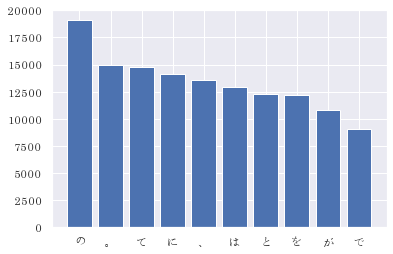

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

words_df = pd.DataFrame(words[:10], columns=['word', 'count'])
sns.set(font='AppleMyungjo')

fig = plt.figure()
ax = fig.add_subplot(111)
ax.bar(words_df['word'], words_df['count'])
plt.savefig('./output/36.png')

## 37. 「猫」と共起頻度の高い上位10語
「猫」とよく共起する（共起頻度が高い）10語とその出現頻度をグラフ（例えば棒グラフなど）で表示せよ．

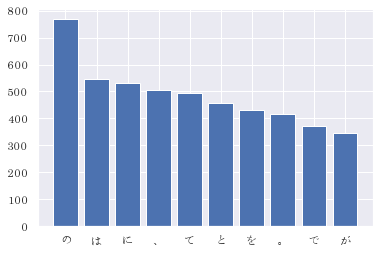

In [9]:
cats = []
for sentence in docs:
    cat_list = list(filter(lambda e: e['surface'] == '猫', sentence))
    if len(cat_list) > 0:
        for morpheme in sentence:
            if morpheme['surface'] != '猫':
                cats.append(morpheme['surface'])
cats = collections.Counter(cats)
# 出現頻度を算出
cats = cats.most_common()
# 出現頻度順にソート
cats = sorted(cats, key=lambda e: e[1], reverse=True)

cats_df = pd.DataFrame(cats[:10], columns=['word', 'count'])
sns.set(font='AppleMyungjo')

fig = plt.figure()
ax = fig.add_subplot(111)
ax.bar(cats_df['word'], cats_df['count'])
plt.savefig('./output/37.png')

## 38. ヒストグラム
単語の出現頻度のヒストグラム（横軸に出現頻度，縦軸に出現頻度をとる単語の種類数を棒グラフで表したもの）を描け．

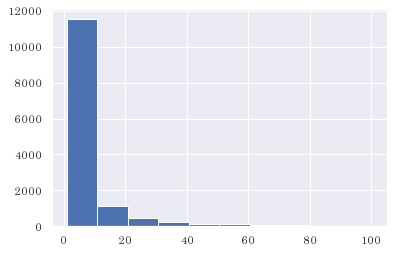

In [10]:
hist_df = pd.DataFrame(words, columns=['word', 'count'])
sns.set(font='AppleMyungjo')

fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(hist_df['count'], range=(1, 100))
plt.savefig('./output/38.png')

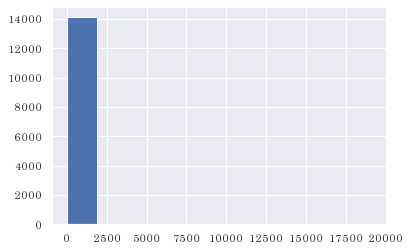

In [11]:
hist_df = pd.DataFrame(words, columns=['word', 'count'])
sns.set(font='AppleMyungjo')

fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(hist_df['count'])
plt.savefig('./output/38_2.png')

## 39. Zipfの法則
単語の出現頻度順位を横軸，その出現頻度を縦軸として，両対数グラフをプロットせよ．

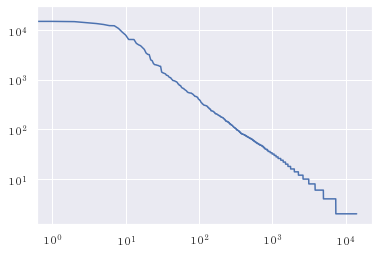

In [12]:
zipf_df = pd.DataFrame(words, columns=['word', 'count'])
sns.set(font='AppleMyungjo')

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_yscale('log')
ax.set_xscale('log')
ax.plot(zipf_df['count'])
plt.savefig('./output/39.png')